In [ ]:
import numpy as np 
from scipy import stats
import pymc3 as pm
import arviz as az
import theano
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
az.style.use("arviz-darkgrid")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Lets simulate data

In [ ]:
#np draw from distribution
x = np.random.normal(30, 5, 50)
y = x + np.random.normal(-0.1, 0.2, 50)


In [ ]:
#subtract (group difference)
x_real = x-y
#Scale values
x_real = x_real/np.std(x_real)

In [67]:
with pm.Model() as Cauchy:
    #priors
    delta = pm.Cauchy("delta", 0, 1)
    sigma = pm.HalfCauchy("sigma", 1)
    mu = pm.Deterministic("mu", sigma*delta)
    #like
    y_pred = pm.Normal("y_pred", mu = mu, sd = sigma, observed = x_real)
    #sample
    trace_1 = pm.sample(2000, tune = 2000, target_accept = 0.9)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, delta]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 26 seconds.


In [ ]:
pm.model_to_graphviz(Cauchy)

In [ ]:
az.summary(trace_1)

In [ ]:
az.plot_trace(trace_1)

### 8.1.1
#### You could also use halfnormal or exponential priors and achieve reasonable results

In [ ]:
with pm.Model() as Exponential:
    #priors
    delta = pm.Cauchy("delta", 0, 1)
    sigma = pm.Exponential("sigma", 1)
    mu = pm.Deterministic("mu", sigma*delta)
    #like
    y_pred = pm.Normal("y_pred", mu = mu, sd = sigma, observed = x_real)
    #sample
    trace_2 = pm.sample(2000, tune = 2000, target_accept = 0.9)

In [ ]:
az.summary(trace_2)

In [ ]:
az.plot_trace(trace_2)

In [1]:
#This is a plot
az.plot_forest([trace_1, trace_2], model_names=["Cauchy","Exponential"], combined=False, colors='cycle', ridgeplot_kind="auto")

NameError: name 'az' is not defined

### 8.1.3


In [ ]:
with pm.Model() as Gaussian:
    #priors
    delta = pm.Normal("delta", 0, 1)
    sigma = pm.Exponential("sigma", 1)
    mu = pm.Deterministic("mu", sigma*delta)
    #like
    y_pred = pm.Normal("y_pred", mu = mu, sd = sigma, observed = x_real)
    #sample
    trace_3 = pm.sample(2000, tune = 2000, target_accept = 0.9)

In [ ]:
az.summary(trace_3)

In [ ]:
#This is a plot
az.plot_forest([trace_1, trace_2, trace_3], model_names=["Cauchy","Exponential", "Gaussian"], combined=False, colors='cycle', ridgeplot_kind="auto")

### This makes no difference on the results

## 8.2.1

In [65]:
with pm.Model() as Cauchy2:
    #priors
    delta = pm.HalfCauchy("delta", 1)
    delta_1 = pm.Deterministic("delta_1",(-1)*delta)
    sigma = pm.HalfCauchy("sigma", 1)
    mu = pm.Deterministic("mu", sigma*delta_1)
    #like
    y_pred = pm.Normal("y_pred", mu = mu, sd = sigma, observed = x_real)
    #sample
    trace_4 = pm.sample(2000, tune = 2000, target_accept = 0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, delta]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 27 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


In [71]:
az.summary(trace_4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
delta,0.037,0.036,0.000,0.103,0.000,0.000,5133.0,5133.0,3591.0,2823.0,1.0
delta_1,-0.037,0.036,-0.103,-0.000,0.000,0.000,5133.0,5133.0,3591.0,2823.0,1.0
sigma,1.166,0.121,0.940,1.386,0.002,0.001,3783.0,3623.0,3994.0,3195.0,1.0
mu,-0.044,0.043,-0.122,-0.000,0.001,0.000,4994.0,4994.0,3538.0,2792.0,1.0


In [70]:
az.summary(trace_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
delta,0.533,0.151,0.249,0.821,0.002,0.002,5208.0,5052.0,5219.0,4450.0,1.0
sigma,1.017,0.104,0.838,1.218,0.002,0.001,4755.0,4730.0,4764.0,4937.0,1.0
mu,0.536,0.143,0.258,0.794,0.002,0.001,6306.0,6204.0,6318.0,5422.0,1.0


array([[<AxesSubplot:title={'center':'delta'}>,
        <AxesSubplot:title={'center':'delta'}>],
       [<AxesSubplot:title={'center':'delta_1'}>,
        <AxesSubplot:title={'center':'delta_1'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>]], dtype=object)

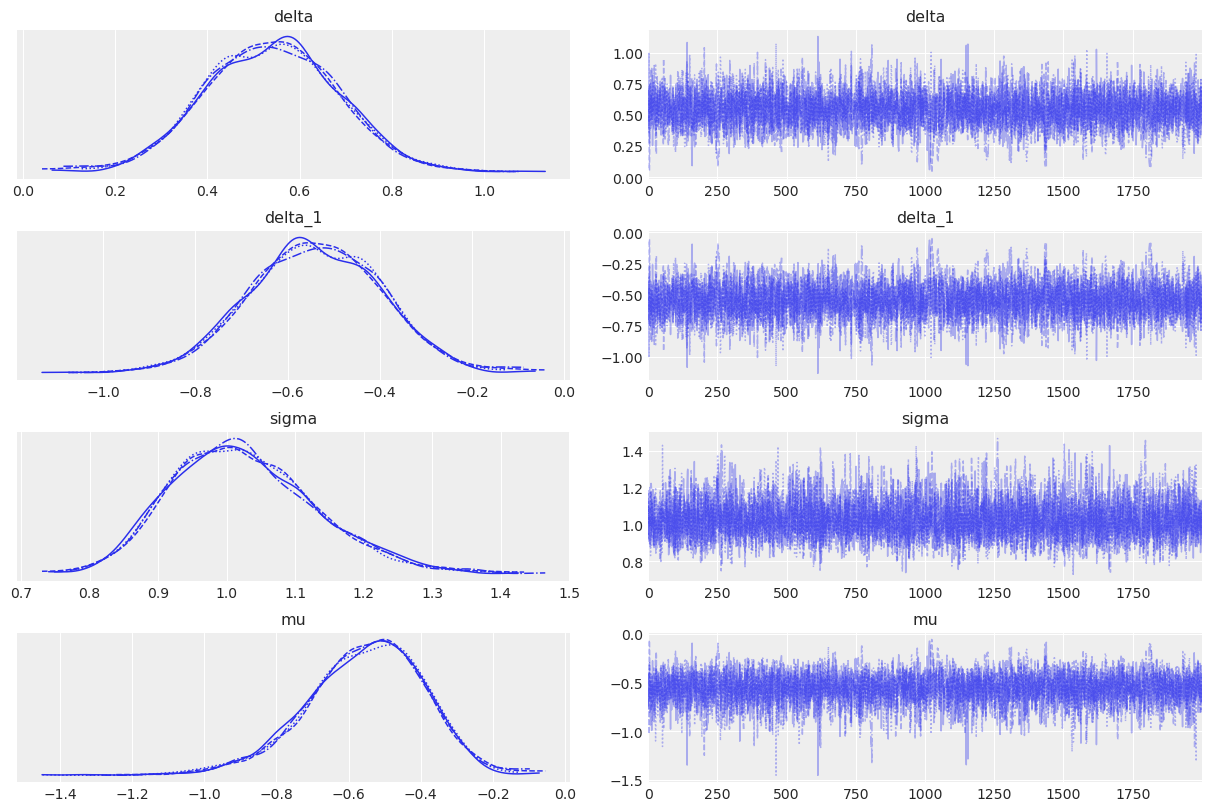

In [63]:
az.plot_trace(trace_4)

<AxesSubplot:>

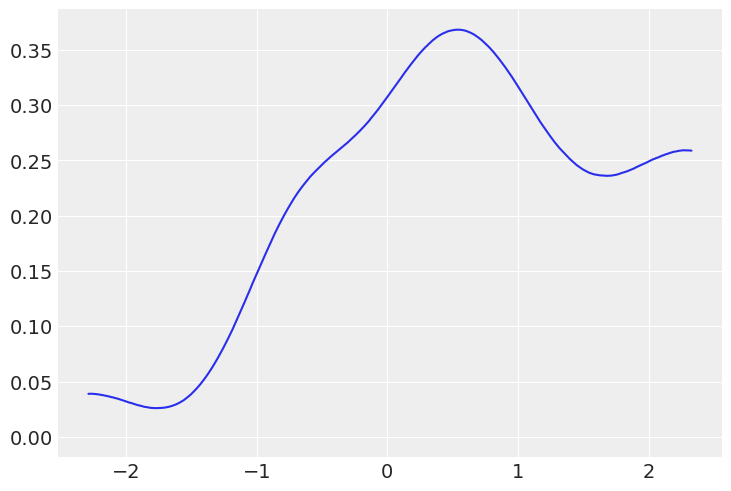

In [64]:
az.plot_kde(x_real)

In [72]:
with pm.Model() as Cauchy3:
    #priors
    delta = pm.HalfCauchy("delta", 1)
    sigma = pm.HalfCauchy("sigma", 1)
    mu = pm.Deterministic("mu", sigma*delta)
    #like
    y_pred = pm.Normal("y_pred", mu = mu, sd = sigma, observed = x_real)
    #sample
    trace_5 = pm.sample(2000, tune = 2000, target_accept = 0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, delta]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 26 seconds.


In [76]:
az.summary(trace_5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
delta,0.534,0.153,0.264,0.847,0.003,0.002,3127.0,3127.0,3100.0,2687.0,1.0
sigma,1.018,0.106,0.824,1.211,0.002,0.001,3786.0,3752.0,3838.0,4204.0,1.0
mu,0.538,0.146,0.263,0.817,0.002,0.002,3839.0,3839.0,3833.0,2757.0,1.0
